In [15]:
import sympy as sp
from sympy import sin, cos, pi
import numpy as np

theta0, theta1, theta2, theta3, theta4, theta5 = sp.symbols('theta0 theta1 theta2 theta3 theta4 theta5')
d0, d1, d2, d3, d4, d5 = sp.symbols('d0 d1 d2 d3 d4 d5')
a0, a1, a2, a3, a4, a5 = sp.symbols('a0 a1 a2 a3 a4 a5')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5 = sp.symbols('alpha0 alpha1 alpha2 alpha3 alpha4 alpha5')

theta_0, d_0, a_0, alpha_0 = theta0, 50e-3, 0, pi/2
theta_1, d_1, a_1, alpha_1 = theta1 + pi/2, 0, 93e-3, 0
theta_2, d_2, a_2, alpha_2 = theta2, 0, 93e-3, 0
theta_3, d_3, a_3, alpha_3 = theta3, 0, 0, 0

theta = [theta_0, theta_1, theta_2, theta_3]
d = [d_0, d_1, d_2, d_3]
a = [a_0, a_1, a_2, a_3]
alpha = [alpha_0, alpha_1, alpha_2, alpha_3]

# Rød=x, Grøn=y, Blå=z
Mat = sp.Matrix([[theta_0, d_0, a_0, alpha_0],
                 [theta_1, d_1, a_1, alpha_1],
                 [theta_2, d_2, a_2, alpha_2],
                 [theta_3, d_3, a_3, alpha_3]])

display(Mat)


Matrix([
[       theta0, 0.05,     0, pi/2],
[theta1 + pi/2,    0, 0.093,    0],
[       theta2,    0, 0.093,    0],
[       theta3,    0,     0,    0]])

In [16]:
T = lambda theta, d, a, alpha: sp.Matrix([[cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), a*cos(theta)],
                                          [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta)],
                                          [0, sin(alpha), cos(alpha), d],
                                          [0, 0, 0, 1]])
Translation = lambda x, y, z: sp.Matrix([[1, 0, 0, x],
                                         [0, 1, 0, y],
                                         [0, 0, 1, z],
                                         [0, 0, 0, 1]])
A = sp.Identity(4)
T_arr = [A]
for (th, di, ai, al) in zip(theta, d, a, alpha):
     T_arr.append(T_arr[-1]*T(th, di, ai, al))

pointer = [50e-3, 0, 0]
camera = [35e-3, 45e-3, 0]

T_4 = T_arr[4] * Translation(*pointer)
T_5 = T_arr[4] * Translation(*camera)

display(T_4)

Matrix([
[(sin(theta1)*sin(theta2)*cos(theta0) - cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) + (-sin(theta1)*cos(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta3), (sin(theta1)*sin(theta2)*cos(theta0) - cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) - (-sin(theta1)*cos(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*sin(theta3),  sin(theta0), 0.05*(sin(theta1)*sin(theta2)*cos(theta0) - cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) + 0.05*(-sin(theta1)*cos(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta3) - 0.093*sin(theta1)*cos(theta0)*cos(theta2) - 0.093*sin(theta1)*cos(theta0) - 0.093*sin(theta2)*cos(theta0)*cos(theta1)],
[(sin(theta0)*sin(theta1)*sin(theta2) - sin(theta0)*cos(theta1)*cos(theta2))*sin(theta3) + (-sin(theta0)*sin(theta1)*cos(theta2) - sin(theta0)*sin(theta2)*cos(theta1))*cos(theta3), (sin(theta0)*sin(theta1)*sin(theta2) - sin(theta0)*cos(theta1)*cos(theta2))*cos(theta3) - (-sin(theta0)*sin(theta1)*cos(thet

In [17]:
def get_angles(T, pos, initial_guess):
    x_04 = T[0:3,0]
    o_04 = T[0:3,3]
    eq1 = sp.Eq(o_04[0], pos[0])
    eq2 = sp.Eq(o_04[1], pos[1])
    eq3 = sp.Eq(o_04[2], pos[2])
    eq4 = sp.Eq(x_04[2], 0)
    
    # Solve numerically
    solution = sp.nsolve((eq1, eq2, eq3, eq4), [theta0, theta1, theta2, theta3], initial_guess, tol=1e-6)
    #convert to degrees
    solution = [s for s in solution]
    
    return solution

# Example usage
initial_guess = [1, 1, 1, 1]  # Provide an initial guess for the angles
pos = sp.Matrix([150e-3, 0, 120e-3])  # Example position
angles = get_angles(T_4, pos, initial_guess)

print(angles)
print("Position")
display(T_4.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1]))

[3.14159265091813, -12.4612367194736, 14.2762437581543, -6.52739601906535]
Position


Matrix([
[    0.149999997930147],
[-4.00749979384566e-10],
[     0.11999998299887],
[                    1]])

## Exercise 3

In [18]:
from mpl_toolkits.mplot3d import Axes3D

pc = sp.Matrix([150e-3, 0, 120e-3])
R = 32e-3
p_circ = [pc + R*sp.Matrix([0, cos(phi), sin(phi)]) for phi in np.linspace(np.pi, 3*np.pi, 36)] 

angles_circ = []
initial_guess = [1, 1, 1, 1]
for p in p_circ:
    angles_circ_temp = get_angles(T_4, p, initial_guess)
    initial_guess = angles_circ_temp
    angles_circ.append(angles_circ_temp)

print(angles_circ)

[[2.93141236251231, -6.14256125844875, 14.2362814602635, -12.8061091821995], [2.93469147131228, -6.12713618692016, 14.2822499150327, -12.8675027084972], [2.94445664242937, -6.11068758483389, 14.3258465502356, -12.9275479457864], [2.96046410344995, -6.09386874366413, 14.3658443967204, -12.9843646334410], [2.98229864903297, -6.07749079599147, 14.4011739379566, -13.0360721223498], [3.00935778471032, -6.06247798245539, 14.4309291779610, -13.0808401758903], [3.04084305213552, -6.04979244330253, 14.4543764532178, -13.1169729903000], [3.07576436605977, -6.04033267227964, 14.4709583785013, -13.1430146866063], [3.11296410307457, -6.03481978945096, 14.4802930581016, -13.1578622490353], [3.15116354214351, -6.03369424435549, 14.4821704183228, -13.1608651543520], [3.18902815192694, -6.03704779090116, 14.4765486604808, -13.1518898499643], [3.22524227939847, -6.04460886426571, 14.4635534029053, -13.1313335190243], [3.25858061064659, -6.05578541850762, 14.4434801158997, -13.1000836777768], [3.28796488

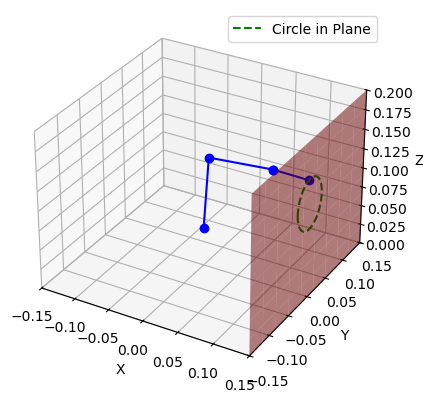

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

def plot_robot_from_angles(angles):
    p1 = T_arr[1].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p2 = T_arr[2].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p3 = T_arr[3].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p4 = T_arr[4].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p5 = T_4.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])

    import matplotlib.pyplot as plt    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract points
    points = [p1, p2, p3, p4, p5]
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    z_vals = [p[2] for p in points]

    # Plot points and lines
    ax.plot(x_vals, y_vals, z_vals, marker='o', linestyle='-', color='b')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-0.15, 0.15])
    ax.set_ylim([-0.15, 0.15])
    ax.set_zlim([0, 0.2])
    # Plot a plane with x=0.15
    xx, yy = np.meshgrid(np.linspace(-0.15, 0.15, 10), np.linspace(0, 0.2, 10))
    zz = np.zeros_like(xx) + 0.15
    ax.plot_surface(zz, xx, yy, color='r', alpha=0.5)
    # Plot the circle in the plane
    x_vals = [p[0] for p in p_circ]
    y_vals = [p[1] for p in p_circ]
    z_vals = [p[2] for p in p_circ]
    ax.plot(x_vals, y_vals, z_vals, 'g--', label='Circle in Plane')
    ax.legend()
    plt.show()

    
plot_robot_from_angles(angles_circ[27])



### PART 2: TRAJECTORY PLANNING
In this part, the goal is to plan a trajectory which approximates the circular path from
Problem 3 by means of 5 knot-points at φ0, φ9, φ18, φ27, φ36.

Problem 6: Use the inverse computed joint configurations q(0), q(9), q(18), q(27), q(36) from Problem 3, to find suitable interpolation polynomials for the following segments:

In [63]:
# Make sympy symbols
tA = sp.symbols('tA')

# Make a sympy 4x6 matrix with elements
A = sp.MatrixSymbol('A', 4, 6)
# B = sp.MatrixSymbol('B', 4, 6)
# C = sp.MatrixSymbol('C', 4, 6)
# D = sp.MatrixSymbol('D', 4, 6)

# Initial position should be zero, tA=0
segAeq1 = sp.Eq(angles_circ[0], A[0,5]*tA**5 + A[0,4]*tA**4 + A[0,3]*tA**3 + A[0,2]*tA**2 + A[0,1]*tA + A[0,0]).subs(tA, 0)
segAeq2 = sp.Eq(angles_circ[0], A[1,5]*tA**5 + A[1,4]*tA**4 + A[1,3]*tA**3 + A[1,2]*tA**2 + A[1,1]*tA + A[1,0]).subs(tA, 0)
segAeq3 = sp.Eq(angles_circ[0], A[2,5]*tA**5 + A[2,4]*tA**4 + A[2,3]*tA**3 + A[2,2]*tA**2 + A[2,1]*tA + A[2,0]).subs(tA, 0)
segAeq4 = sp.Eq(angles_circ[0], A[3,5]*tA**5 + A[3,4]*tA**4 + A[3,3]*tA**3 + A[3,2]*tA**2 + A[3,1]*tA + A[3,0]).subs(tA, 0)

# Position at tA=2s
segAeq5 = sp.Eq(angles_circ[9], A[0,5]*tA**5 + A[0,4]*tA**4 + A[0,3]*tA**3 + A[0,2]*tA**2 + A[0,1]*tA + A[0,0]).subs(tA, 2)
segAeq6 = sp.Eq(angles_circ[9], A[1,5]*tA**5 + A[1,4]*tA**4 + A[1,3]*tA**3 + A[1,2]*tA**2 + A[1,1]*tA + A[1,0]).subs(tA, 2)
segAeq7 = sp.Eq(angles_circ[9], A[2,5]*tA**5 + A[2,4]*tA**4 + A[2,3]*tA**3 + A[2,2]*tA**2 + A[2,1]*tA + A[2,0]).subs(tA, 2)
segAeq8 = sp.Eq(angles_circ[9], A[3,5]*tA**5 + A[3,4]*tA**4 + A[3,3]*tA**3 + A[3,2]*tA**2 + A[3,1]*tA + A[3,0]).subs(tA, 2)

# Initial velocity should be zero, tA=0
segAeq9 = sp.Eq(0, A[0,5]*5*tA**4 + A[0,4]*4*tA**3 + A[0,3]*3*tA**2 + A[0,2]*2*tA + A[0,1]).subs(tA, 0)
segAeq10 = sp.Eq(0, A[1,5]*5*tA**4 + A[1,4]*4*tA**3 + A[1,3]*3*tA**2 + A[1,2]*2*tA + A[1,1]).subs(tA, 0)
segAeq11 = sp.Eq(0, A[2,5]*5*tA**4 + A[2,4]*4*tA**3 + A[2,3]*3*tA**2 + A[2,2]*2*tA + A[2,1]).subs(tA, 0)
segAeq12 = sp.Eq(0, A[3,5]*5*tA**4 + A[3,4]*4*tA**3 + A[3,3]*3*tA**2 + A[3,2]*2*tA + A[3,1]).subs(tA, 0)

# Velocity at tA=2s ############ JACOBI ################################
segAeq9 = sp.Eq(0, A[0,5]*5*tA**4 + A[0,4]*4*tA**3 + A[0,3]*3*tA**2 + A[0,2]*2*tA + A[0,1]).subs(tA, 2)
segAeq10 = sp.Eq(0, A[1,5]*5*tA**4 + A[1,4]*4*tA**3 + A[1,3]*3*tA**2 + A[1,2]*2*tA + A[1,1]).subs(tA, 2)
segAeq11 = sp.Eq(0, A[2,5]*5*tA**4 + A[2,4]*4*tA**3 + A[2,3]*3*tA**2 + A[2,2]*2*tA + A[2,1]).subs(tA, 2)
segAeq12 = sp.Eq(0, A[3,5]*5*tA**4 + A[3,4]*4*tA**3 + A[3,3]*3*tA**2 + A[3,2]*2*tA + A[3,1]).subs(tA, 2)

# Acceleration should be zero, tA=0
eq9 = sp.Eq(0, A[0,5]*20*tA**3 + A[0,4]*12*tA**2 + A[0,3]*6*tA + A[0,2]*2).subs(tA, 0)
eq10 = sp.Eq(0, A[1,5]*20*tA**3 + A[1,4]*12*tA**2 + A[1,3]*6*tA + A[1,2]*2).subs(tA, 0)
eq11 = sp.Eq(0, A[2,5]*20*tA**3 + A[2,4]*12*tA**2 + A[2,3]*6*tA + A[2,2]*2).subs(tA, 0)
eq12 = sp.Eq(0, A[3,5]*20*tA**3 + A[3,4]*12*tA**2 + A[3,3]*6*tA + A[3,2]*2).subs(tA, 0)

# display(eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11, eq12)

# Solve the equations


# solution = sp.solve((eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11, eq12), A)

display(eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11, eq12)

True

Eq(tA**5*B[0, 5] + tA**4*B[0, 4] + tA**3*B[0, 3] + tA**2*B[0, 2] + tA*B[0, 1] + B[0, 0], tA**5*A[1, 5] + tA**4*A[1, 4] + tA**3*A[1, 3] + tA**2*A[1, 2] + tA*A[1, 1] + A[1, 0])

Eq(tA**5*C[0, 5] + tA**4*C[0, 4] + tA**3*C[0, 3] + tA**2*C[0, 2] + tA*C[0, 1] + C[0, 0], tA**5*A[2, 5] + tA**4*A[2, 4] + tA**3*A[2, 3] + tA**2*A[2, 2] + tA*A[2, 1] + A[2, 0])

Eq(tA**5*D[0, 5] + tA**4*D[0, 4] + tA**3*D[0, 3] + tA**2*D[0, 2] + tA*D[0, 1] + D[0, 0], tA**5*A[3, 5] + tA**4*A[3, 4] + tA**3*A[3, 3] + tA**2*A[3, 2] + tA*A[3, 1] + A[3, 0])

Eq(0, A[0, 1])

Eq(0, A[1, 1])

Eq(0, A[2, 1])

Eq(0, A[3, 1])

Eq(0, 2*A[0, 2])

Eq(0, 2*A[1, 2])

Eq(0, 2*A[2, 2])

Eq(0, 2*A[3, 2])